In [ ]:
pip install pandas matplotlib yfinance seaborn

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

In [293]:
data = pd.read_csv('b3_stocks.csv')

In [294]:
data['Setor'].unique()

array(['Comércio', 'Viagens e Lazer',
       'Serv.Méd.Hospit. Análises e Diagnósticos',
       'Material de Transporte', 'Máquinas e Equipamentos',
       'Intermediários Financeiros', 'Programas e Serviços',
       'Petróleo, Gás e Biocombustíveis', 'Serviços Financeiros Diversos',
       'Diversos', 'Mineração', 'Bebidas', 'Serviços Diversos',
       'Construção Civil', 'Energia Elétrica',
       'Tecidos, Vestuário e Calçados', 'Transporte',
       'Siderurgia e Metalurgia', 'Comércio e Distribuição',
       'Computadores e Equipamentos', 'Alimentos Processados',
       'Produtos de Uso Pessoal e de Limpeza', 'Holdings Diversificadas',
       'Telecomunicações', 'Água e Saneamento', 'Madeira e Papel',
       'Previdência e Seguros', 'Químicos', 'Construção e Engenharia',
       'Exploração de Imóveis', 'Hoteis e Restaurantes', 'Agropecuária',
       'Automóveis e Motocicletas', 'Mídia', 'Utilidades Domésticas',
       'Medicamentos e Outros Produtos', '0', 'Outros',
       'Materia

In [295]:
data['Subsetor'].unique()

array(['Eletrodomésticos', 'Viagens e Turismo',
       'Serv.Méd.Hospit. Análises e Diagnósticos',
       'Material Aeronáutico e de Defesa', 'Máq. e Equip. Industriais',
       'Bancos', 'Programas e Serviços',
       'Exploração, Refino e Distribuição',
       'Serviços Financeiros Diversos', 'Aluguel de carros',
       'Tecidos, Vestuário e Calçados', 'Minerais Metálicos',
       'Cervejas e Refrigerantes', 'Produtos Diversos',
       'Serviços Educacionais', 'Serviços Diversos', 'Incorporações',
       'Energia Elétrica', 'Material Rodoviário', 'Calçados',
       'Transporte Aéreo', 'Siderurgia', 'Medicamentos e Outros Produtos',
       'Computadores e Equipamentos', 'Carnes e Derivados',
       'Produtos de Uso Pessoal', 'Alimentos', 'Transporte Ferroviário',
       'Holdings Diversificadas', 'Telecomunicações',
       'Motores, Compressores e Outros', 'Exploração de Rodovias',
       'Acessórios', 'Serviços de Apoio e Armazenagem',
       'Alimentos Diversos', 'Transporte Hidrovi

In [296]:
data = data[data['Div. Yield'].str.len() < 7]
data['Div. Yield'] = data['Div. Yield'].str.replace('%', '').str.replace(',', '.')
data['Div. Yield'] = pd.to_numeric(data['Div. Yield'])
data = data[data['Div. Yield'] > 6]

data['P/L'] = pd.to_numeric(data['P/L'].str.replace(',', '.'))
data = data[data['P/L'] <= 15]
data = data[data['P/L'] >= 0]

data = data[data['Valor de mercado'] != '0']

subsctors = ['Minerais Metálicos','Energia Elétrica', 'Bancos', 'Água e Saneamento', 'Agricultura','Madeira']

data = data[data['Subsetor'].isin(subsctors)]

data = data.drop('Unnamed: 0', axis=1)
data.set_index('nome')

,Tipo,Empresa,Setor,Subsetor,Cotação,Valor de mercado,Valor da firma,P/L,P/VP,P/EBIT,...,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Patrim. Líq
nome,,,,,,,,,,,,,,,,,,,,,
VALE3,ON NM,VALE ON NM,Mineração,Minerais Metálicos,"77,20",350.411.000.000,400.532.000.000,7.37,"1,84","4,38",...,"38,8%","23,3%","17,9%","20,1%","25,0%","1,08","0,37","0,46","0,79",190.172.000.000
BBDC4,PN N1,BANCO BRADESCO S.A. PN N1,Intermediários Financeiros,Bancos,"17,09",181.875.000.000,-,12.24,"1,13",-,...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
TRPL4,PN N1,TRANSMISSÃO PAULISTA PN N1,Energia Elétrica,Energia Elétrica,"26,50",17.460.400.000,24.678.000.000,7.39,"0,97","5,52",...,"54,9%","41,9%","9,0%","9,5%","13,1%","1,90","0,50","0,16","0,50",17.977.200.000
CMIG4,PN N1,CEMIG PN N1,Energia Elétrica,Energia Elétrica,"11,48",25.271.700.000,33.209.600.000,4.78,"1,03","3,07",...,"22,8%","14,7%","14,7%","16,7%","21,6%","1,30","0,50","0,64","0,45",24.427.800.000
BBAS3,ON,BANCO DO BRASIL S.A. ON,Intermediários Financeiros,Bancos,"55,39",158.715.000.000,-,4.75,"0,99",-,...,-,"0,0%","0,0%",-,"20,8%",-,-,-,-,160.489.000.000
CMIN3,ON N2,CSNMINERACAO ON N2,Mineração,Minerais Metálicos,"7,83",42.950.200.000,40.764.100.000,13.94,"3,75","7,33",...,"33,8%","17,8%","19,8%","33,7%","26,9%","2,96","0,74","0,59","1,45",11.444.200.000
AURE3,ON NM,AUREN ON NM,Energia Elétrica,Energia Elétrica,"13,31",13.310.000.000,14.617.900.000,6.56,"0,95","15,46",...,"14,4%","34,0%","2,8%","3,4%","14,5%","1,92","0,44","0,19","0,43",13.962.400.000
BBDC3,ON N1,BANCO BRADESCO S.A. ON N1,Intermediários Financeiros,Bancos,"15,28",162.612.000.000,-,10.95,"1,01",-,...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
SAPR4,PN,SANEPAR PN,Água e Saneamento,Água e Saneamento,"5,89",8.901.000.000,13.302.200.000,5.98,"0,94","3,36",...,"43,6%","24,5%","14,5%","15,9%","15,7%","1,41","0,60","0,33","0,49",9.497.430.000


In [297]:
data.describe()


,P/L,Div. Yield
count,51.000000,51.000000
mean,7.596667,9.929412
std,2.404768,3.272937
min,4.150000,6.100000
25%,6.005000,7.350000
50%,7.150000,9.600000
75%,8.795000,11.350000
max,13.940000,22.500000


In [298]:
data.head()

,nome,Tipo,Empresa,Setor,Subsetor,Cotação,Valor de mercado,Valor da firma,P/L,P/VP,...,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Patrim. Líq
12,VALE3,ON NM,VALE ON NM,Mineração,Minerais Metálicos,"77,20",350.411.000.000,400.532.000.000,7.37,"1,84",...,"38,8%","23,3%","17,9%","20,1%","25,0%","1,08","0,37","0,46","0,79",190.172.000.000
16,BBDC4,PN N1,BANCO BRADESCO S.A. PN N1,Intermediários Financeiros,Bancos,"17,09",181.875.000.000,-,12.24,"1,13",...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
22,TRPL4,PN N1,TRANSMISSÃO PAULISTA PN N1,Energia Elétrica,Energia Elétrica,"26,50",17.460.400.000,24.678.000.000,7.39,"0,97",...,"54,9%","41,9%","9,0%","9,5%","13,1%","1,90","0,50","0,16","0,50",17.977.200.000
30,CMIG4,PN N1,CEMIG PN N1,Energia Elétrica,Energia Elétrica,"11,48",25.271.700.000,33.209.600.000,4.78,"1,03",...,"22,8%","14,7%","14,7%","16,7%","21,6%","1,30","0,50","0,64","0,45",24.427.800.000
44,BBAS3,ON,BANCO DO BRASIL S.A. ON,Intermediários Financeiros,Bancos,"55,39",158.715.000.000,-,4.75,"0,99",...,-,"0,0%","0,0%",-,"20,8%",-,-,-,-,160.489.000.000


<Axes: xlabel='P/L', ylabel='Div. Yield'>

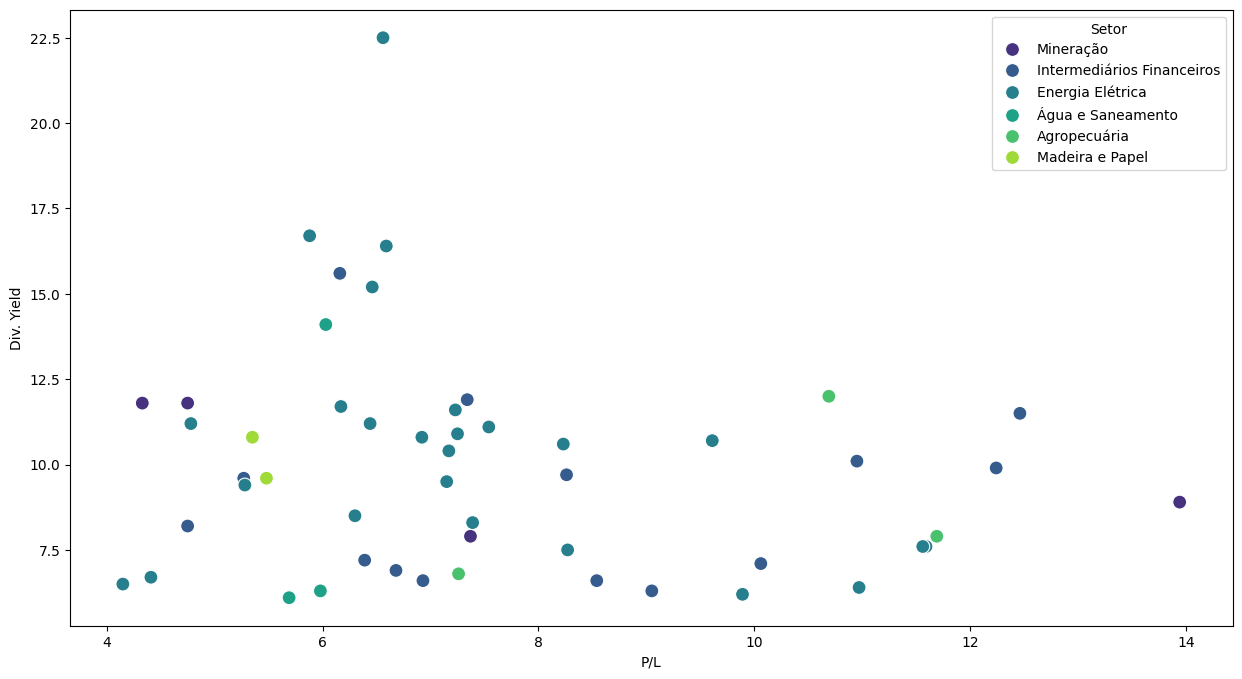

In [299]:
plt.figure(figsize=(15,8))
sns.scatterplot(y='Div. Yield', x='P/L', data=data, hue='Setor', palette='viridis', s=100)

In [300]:
data = data.sort_values(by=['Setor','Subsetor','Div. Yield'], ascending=[False,False,False])
data = data[['nome','Setor','Subsetor','Div. Yield','P/L']]

In [301]:
data

,nome,Setor,Subsetor,Div. Yield,P/L
153,CSMG3,Água e Saneamento,Água e Saneamento,14.1,6.03
113,SAPR4,Água e Saneamento,Água e Saneamento,6.3,5.98
206,SAPR3,Água e Saneamento,Água e Saneamento,6.1,5.69
144,BRAP4,Mineração,Minerais Metálicos,11.8,4.75
266,BRAP3,Mineração,Minerais Metálicos,11.8,4.33
45,CMIN3,Mineração,Minerais Metálicos,8.9,13.94
12,VALE3,Mineração,Minerais Metálicos,7.9,7.37
222,EUCA4,Madeira e Papel,Madeira,10.8,5.35
345,EUCA3,Madeira e Papel,Madeira,9.6,5.48
335,BGIP4,Intermediários Financeiros,Bancos,15.6,6.16


In [338]:
data['yahoo_name'] = data['nome'] + '.SA'

In [344]:
yf.download(data['yahoo_name'].tolist(), start = "2010-01-01", end = "2023-02-06").to_csv('stocks.csv')


[*********************100%%**********************]  51 of 51 completed


In [380]:
stocks = pd.read_csv('stocks.csv', header=[0,1],index_col=[0],parse_dates=[0])

In [381]:
stocks.head()

Adj Close                                                    \
            AGRO3.SA AURE3.SA   BBAS3.SA  BBDC3.SA  BBDC4.SA  BEES3.SA   
Date                                                                     
2010-01-04  5.021647      NaN  12.151030  5.069025  7.447768  1.340092   
2010-01-05  5.021647      NaN  12.029109  4.999211  7.411116  1.334258   
2010-01-06  5.021647      NaN  12.045352  4.969766  7.351825  1.336204   
2010-01-07  5.164421      NaN  12.049428  4.958311  7.332065  1.322589   
2010-01-08  5.164421      NaN  12.118515  4.964858  7.324155  1.402333   

                                                    ...   Volume           \
            BEES4.SA  BGIP3.SA  BGIP4.SA  BMEB3.SA  ... LAND3.SA REDE3.SA   
Date                                                ...                     
2010-01-04  1.439372  5.512950  4.990026  2.915641  ...      NaN        0   
2010-01-05  1.418662  5.391085  4.990026  2.929933  ...      NaN      871   
2010-01-06  1.435231  5.980099  4.990026  2.944226  ...      NaN      725   
2010-01-07  1.418662  5.980099  4.990026  2.998537  ...      NaN      145   
2010-01-08  1.447657  5.980099  4.990026  3.264374  ...      NaN        0   

                                                                           \
           SAPR3.SA SAPR4.SA SLCE3.SA TAEE3.SA TAEE4.SA TRPL3.SA TRPL4.SA   
Date                                                                        
2010-01-04        0        0   882816        0      NaN        0   485740   
2010-01-05        0        0   629200        0      NaN        0   604351   
2010-01-06        0        0  2091848        0      NaN        0   758061   
2010-01-07        0        0  2101044        0      NaN        0   610806   
2010-01-08        0        0  1322772        0      NaN        0   971077   

                     
           VALE3.SA  
Date                 
2010-01-04  2381400  
2010-01-05  3001800  
2010-01-06  2742800  
2010-01-07  2543100  
2010-01-08  2444500  

[5 rows x 306 columns]

In [382]:
close = stocks.loc[:,'Close'].copy()
ret = close.pct_change().dropna()

In [383]:
ret.describe()

,AGRO3.SA,AURE3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEES3.SA,BEES4.SA,BGIP3.SA,BGIP4.SA,BMEB3.SA,...,LAND3.SA,REDE3.SA,SAPR3.SA,SAPR4.SA,SLCE3.SA,TAEE3.SA,TAEE4.SA,TRPL3.SA,TRPL4.SA,VALE3.SA
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,-0.000207,-0.000167,0.000766,-0.001223,-0.001581,0.001058,0.001288,-0.000567,-0.001150,0.000015,...,0.000648,-0.000423,-0.000733,-0.000539,0.000671,-0.000940,-0.000845,-0.000682,-0.000800,-0.000053
std,0.022148,0.019028,0.021697,0.019564,0.020983,0.012443,0.017186,0.007685,0.016813,0.037651,...,0.014466,0.027192,0.019202,0.017192,0.023176,0.014601,0.014887,0.017610,0.012483,0.023297
min,-0.099128,-0.050390,-0.100269,-0.160127,-0.173843,-0.059783,-0.048170,-0.042917,-0.057032,-0.158076,...,-0.035025,-0.084530,-0.069164,-0.054795,-0.066735,-0.092715,-0.099469,-0.082143,-0.043956,-0.066621
25%,-0.011458,-0.010696,-0.010978,-0.010885,-0.011699,-0.003929,-0.007387,0.000000,-0.007320,-0.005286,...,-0.007341,-0.011663,-0.011615,-0.008838,-0.011782,-0.006931,-0.007492,-0.010048,-0.006794,-0.014458
50%,-0.000359,-0.001438,0.000553,0.000000,-0.000981,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.002513,0.000000,0.002147,-0.000357,0.000750,-0.000304,-0.000868,-0.000297
75%,0.014480,0.010545,0.015258,0.009737,0.011340,0.007741,0.009490,0.000000,0.003835,0.000000,...,0.007238,0.007076,0.008718,0.008357,0.013619,0.007516,0.007454,0.008670,0.006938,0.013148
max,0.049705,0.093172,0.076324,0.066217,0.069052,0.067308,0.076471,0.051935,0.079666,0.176513,...,0.081848,0.131769,0.141509,0.127168,0.070567,0.030514,0.044228,0.051940,0.039617,0.103957


In [384]:
summary = ret.describe().T.loc[:, ['std']]
summary['std'] = summary['std']*np.sqrt(252)

In [390]:
summary.head()

,std
AGRO3.SA,0.351589
AURE3.SA,0.302054
BBAS3.SA,0.344429
BBDC3.SA,0.310573
BBDC4.SA,0.333092


In [396]:
summary['std']

AGRO3.SA     0.351589
AURE3.SA     0.302054
BBAS3.SA     0.344429
BBDC3.SA     0.310573
BBDC4.SA     0.333092
BEES3.SA     0.197525
BEES4.SA     0.272813
BGIP3.SA     0.122001
BGIP4.SA     0.266892
BMEB3.SA     0.597689
BMEB4.SA     0.274662
BMGB4.SA     0.378161
BMIN3.SA     0.176635
BMIN4.SA     0.271605
BRAP3.SA     0.368229
BRAP4.SA     0.341455
BRSR3.SA     0.280075
BRSR6.SA     0.303505
CEBR3.SA     0.554691
CEBR5.SA     0.544207
CEBR6.SA     0.463476
CEEB3.SA     0.270120
CEEB5.SA     0.540808
CLSC3.SA     0.215669
CLSC4.SA     0.330292
CMIG3.SA     0.413459
CMIG4.SA     0.353311
CMIN3.SA     0.483816
CPFE3.SA     0.326829
CSMG3.SA     0.415274
CSRN3.SA     0.489907
CSRN5.SA     0.598331
CSRN6.SA     0.603954
EGIE3.SA     0.207288
EKTR3.SA     0.387384
EKTR4.SA     0.522873
EQMA3B.SA    0.438148
EUCA3.SA     0.545381
EUCA4.SA     0.618166
GEPA3.SA     0.413597
GEPA4.SA     0.290169
LAND3.SA     0.229645
REDE3.SA     0.431653
SAPR3.SA     0.304820
SAPR4.SA     0.272914
SLCE3.SA  

In [409]:
financial_data = data.merge(summary[['std']], left_on='yahoo_name', right_index=True, how='left')
financial_data = financial_data.sort_values(by=['Setor','Subsetor','std','Div. Yield'], ascending=[False,False,True,False])

In [410]:
financial_data

,nome,Setor,Subsetor,Div. Yield,P/L,yahoo_name,std
113,SAPR4,Água e Saneamento,Água e Saneamento,6.3,5.98,SAPR4.SA,0.272914
206,SAPR3,Água e Saneamento,Água e Saneamento,6.1,5.69,SAPR3.SA,0.304820
153,CSMG3,Água e Saneamento,Água e Saneamento,14.1,6.03,CSMG3.SA,0.415274
144,BRAP4,Mineração,Minerais Metálicos,11.8,4.75,BRAP4.SA,0.341455
266,BRAP3,Mineração,Minerais Metálicos,11.8,4.33,BRAP3.SA,0.368229
12,VALE3,Mineração,Minerais Metálicos,7.9,7.37,VALE3.SA,0.369834
45,CMIN3,Mineração,Minerais Metálicos,8.9,13.94,CMIN3.SA,0.483816
345,EUCA3,Madeira e Papel,Madeira,9.6,5.48,EUCA3.SA,0.545381
222,EUCA4,Madeira e Papel,Madeira,10.8,5.35,EUCA4.SA,0.618166
367,BGIP3,Intermediários Financeiros,Bancos,11.9,7.34,BGIP3.SA,0.122001


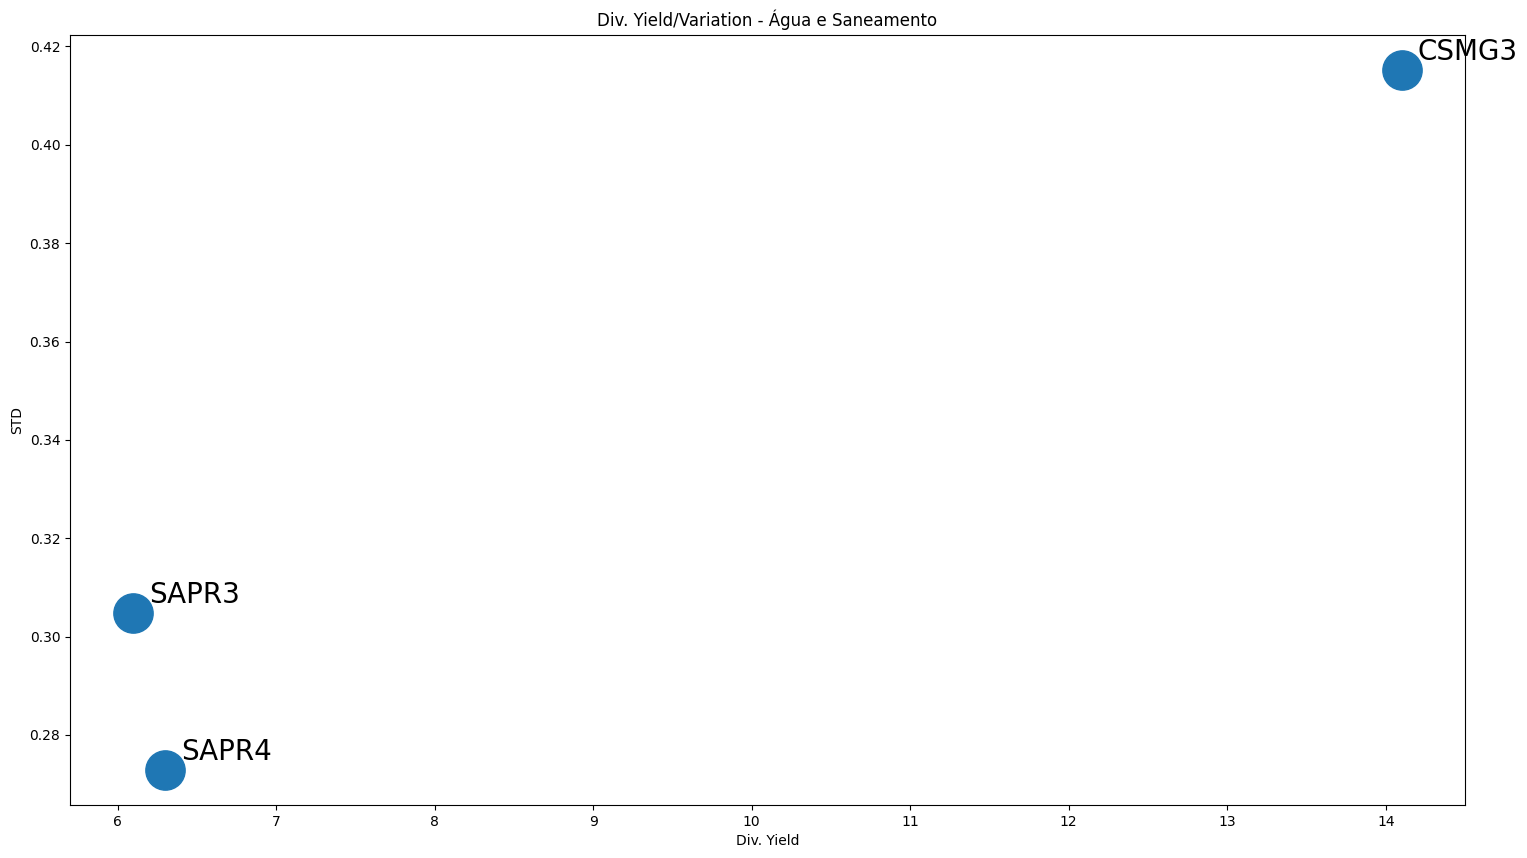

In [422]:
financial_data_saneamento = financial_data[financial_data['Setor'] == 'Água e Saneamento']

plt.scatter(financial_data_saneamento['Div. Yield'], financial_data_saneamento['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Água e Saneamento')

for i in financial_data_saneamento.index:
    plt.annotate(financial_data_saneamento.loc[i, 'nome'], xy=(financial_data_saneamento.loc[i, 'Div. Yield'] + 0.1, financial_data_saneamento.loc[i, 'std'] + 0.002), size=20)

plt.show()

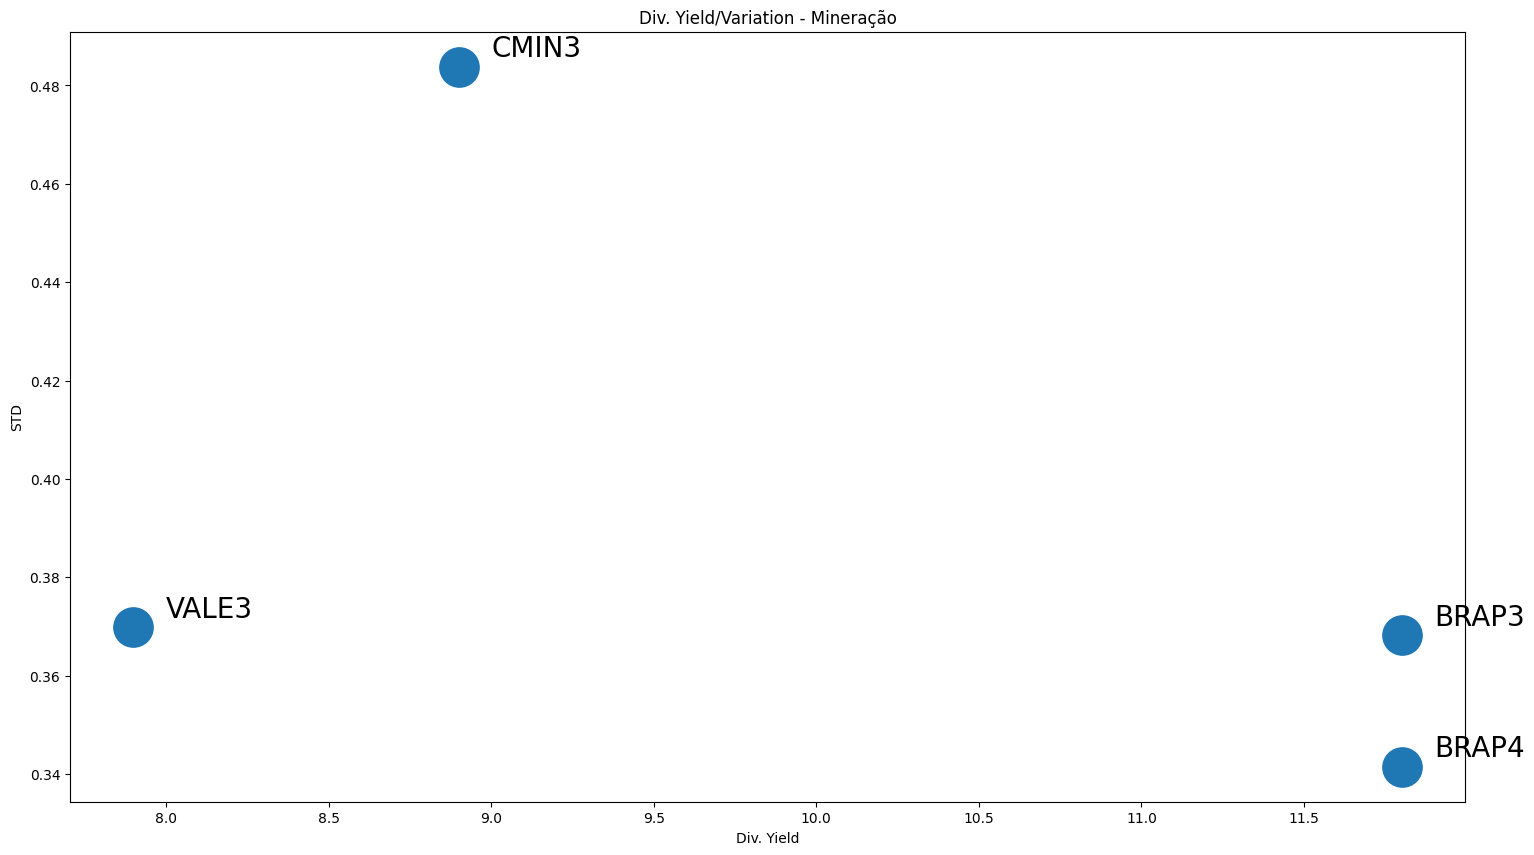

In [428]:
financial_data_mineracao = financial_data[financial_data['Setor'] == 'Mineração']

plt.scatter(financial_data_mineracao['Div. Yield'], financial_data_mineracao['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Mineração')

for i in financial_data_mineracao.index:
    plt.annotate(financial_data_mineracao.loc[i, 'nome'], xy=(financial_data_mineracao.loc[i, 'Div. Yield'] + 0.1, financial_data_mineracao.loc[i, 'std'] + 0.002), size=20)

plt.show()

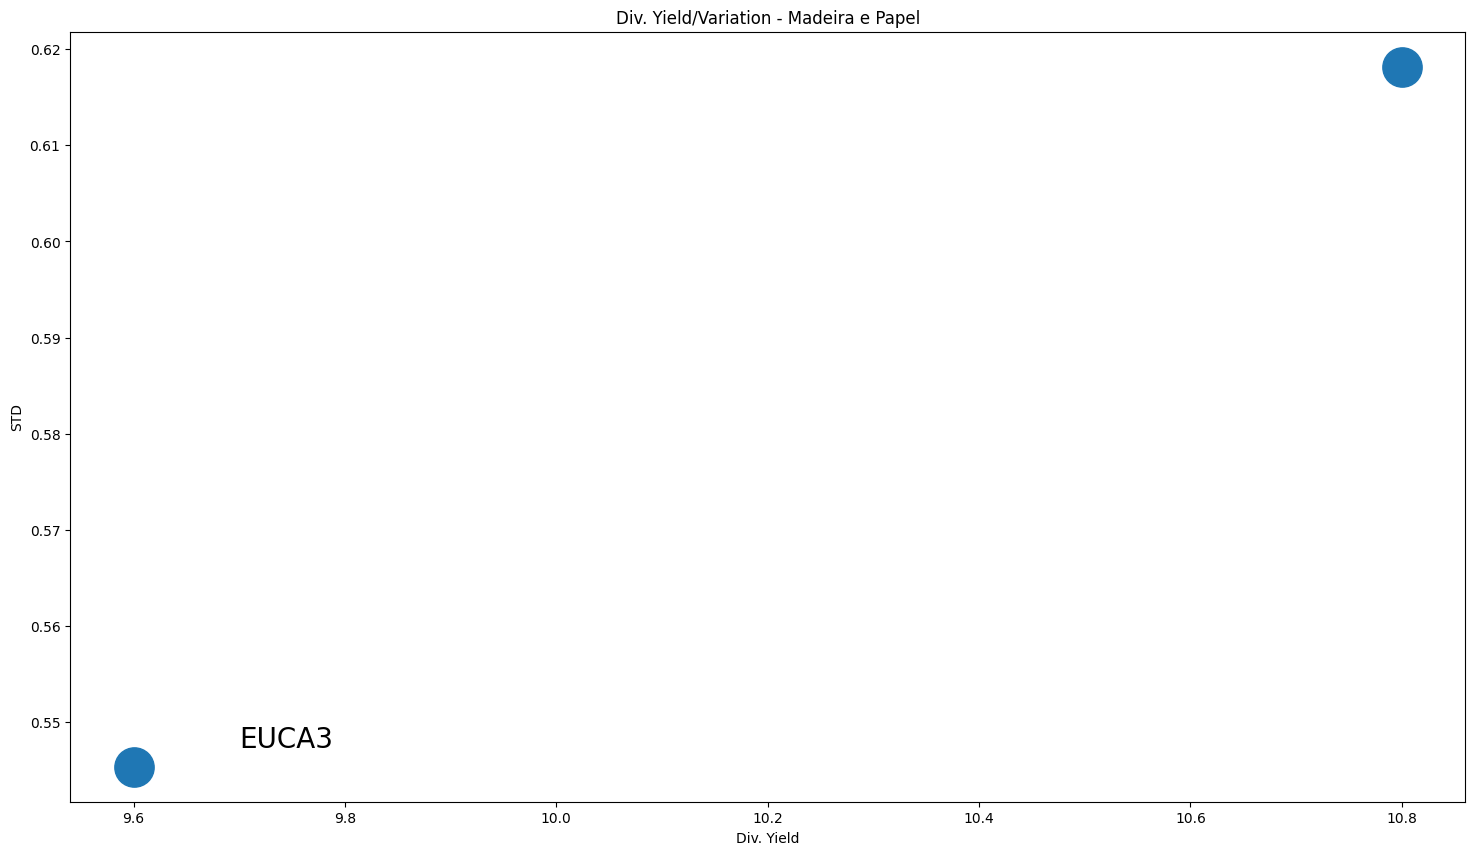

In [429]:
financial_data_papel = financial_data[financial_data['Setor'] == 'Madeira e Papel']

plt.scatter(financial_data_papel['Div. Yield'], financial_data_papel['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Madeira e Papel')

for i in financial_data_papel.index:
    plt.annotate(financial_data_papel.loc[i, 'nome'], xy=(financial_data_papel.loc[i, 'Div. Yield'] + 0.1, financial_data_papel.loc[i, 'std'] + 0.002), size=20)

plt.show()

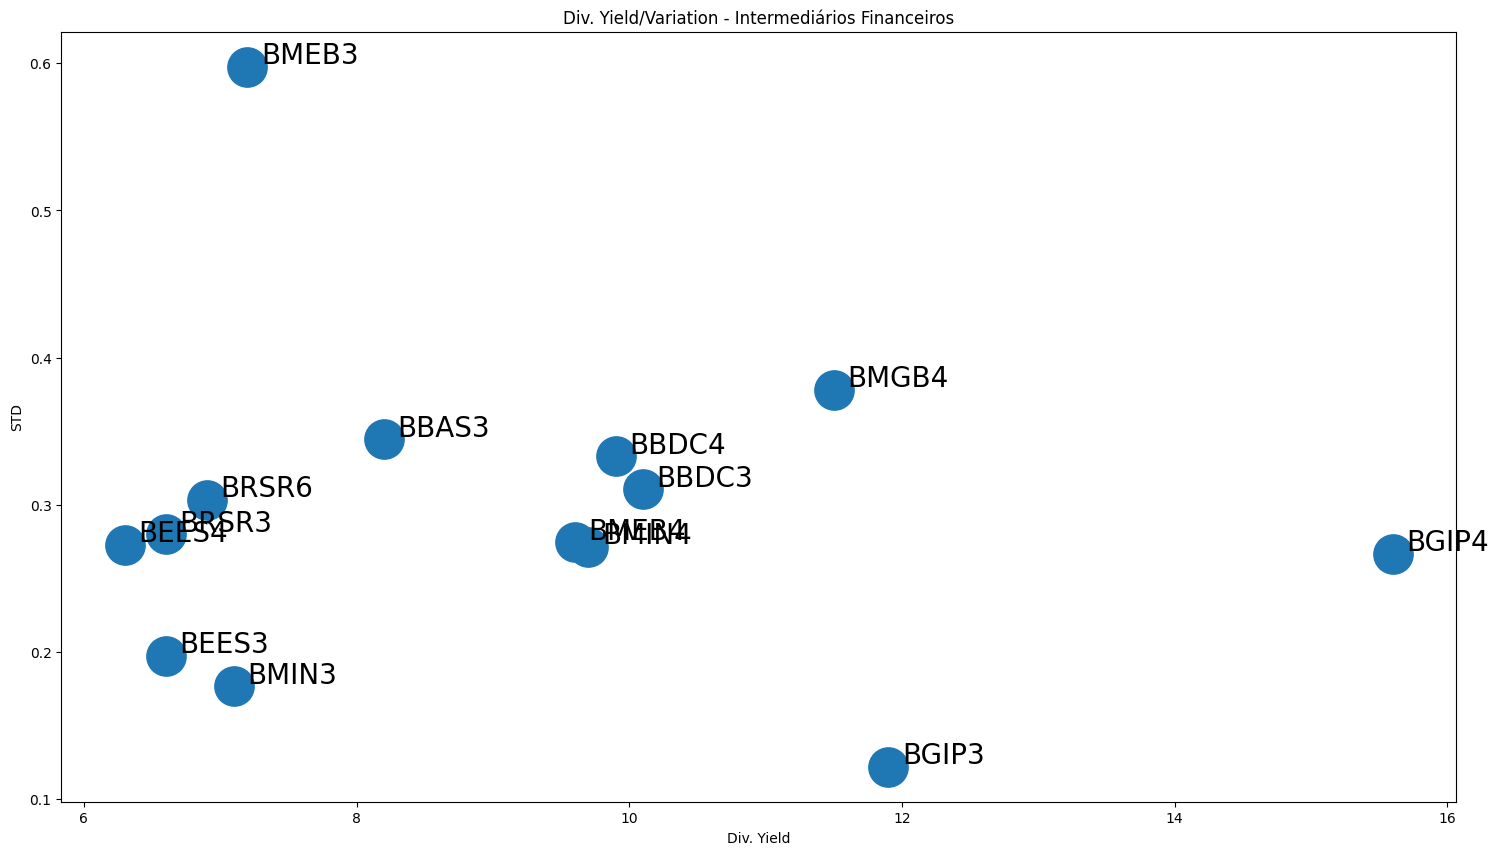

In [425]:
financial_data_banco = financial_data[financial_data['Setor'] == 'Intermediários Financeiros']

plt.scatter(financial_data_banco['Div. Yield'], financial_data_banco['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Intermediários Financeiros')

for i in financial_data_banco.index:
    plt.annotate(financial_data_banco.loc[i, 'nome'], xy=(financial_data_banco.loc[i, 'Div. Yield'] + 0.1, financial_data_banco.loc[i, 'std'] + 0.002), size=20)

plt.show()

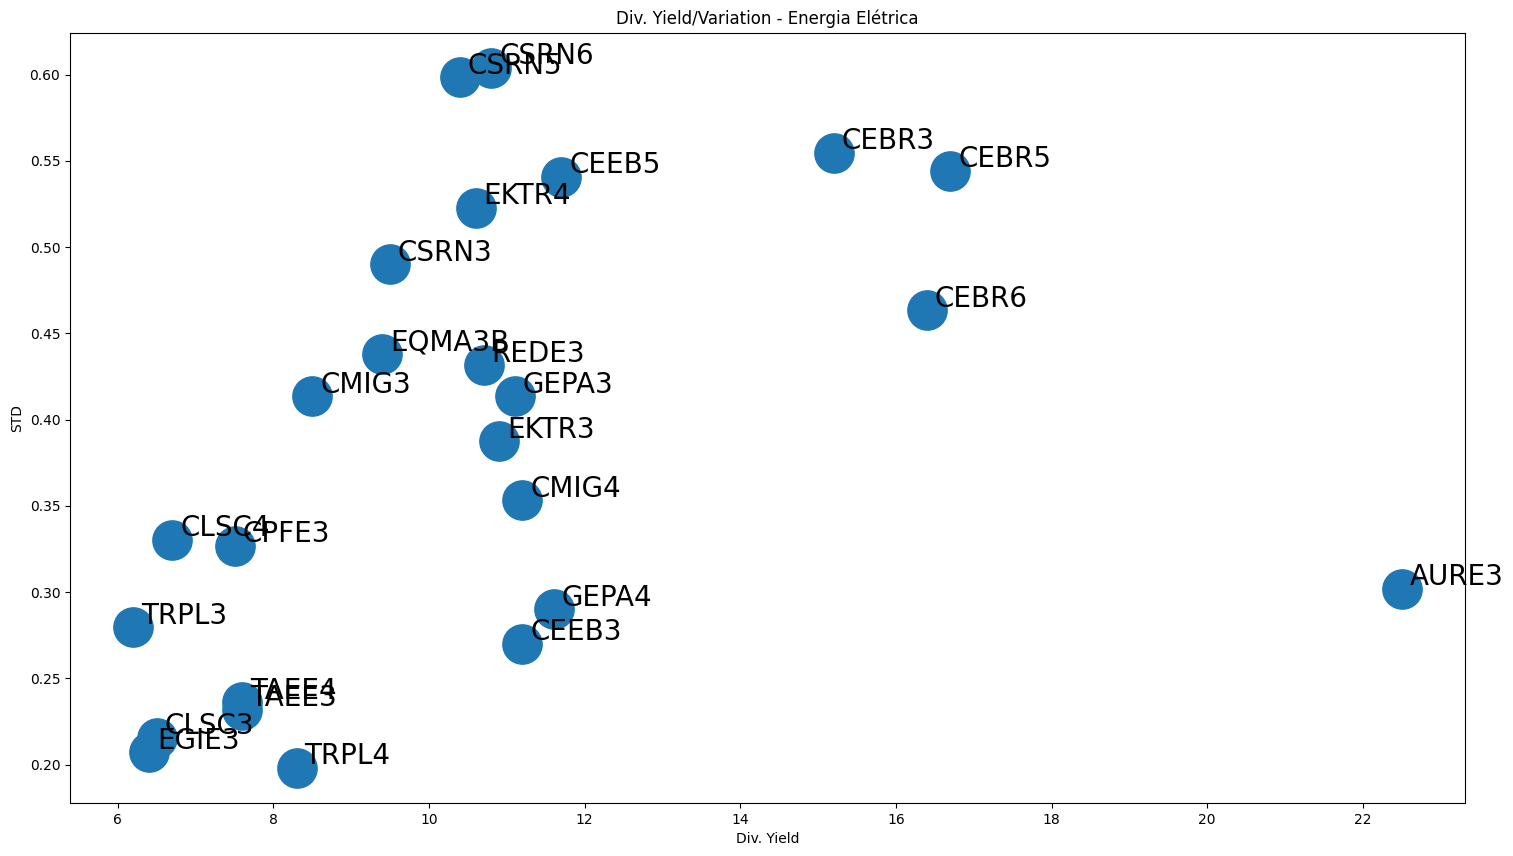

In [424]:
financial_data_energia = financial_data[financial_data['Setor'] == 'Energia Elétrica']

plt.scatter(financial_data_energia['Div. Yield'], financial_data_energia['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Energia Elétrica')

for i in financial_data_energia.index:
    plt.annotate(financial_data_energia.loc[i, 'nome'], xy=(financial_data_energia.loc[i, 'Div. Yield'] + 0.1, financial_data_energia.loc[i, 'std'] + 0.002), size=20)

plt.show()

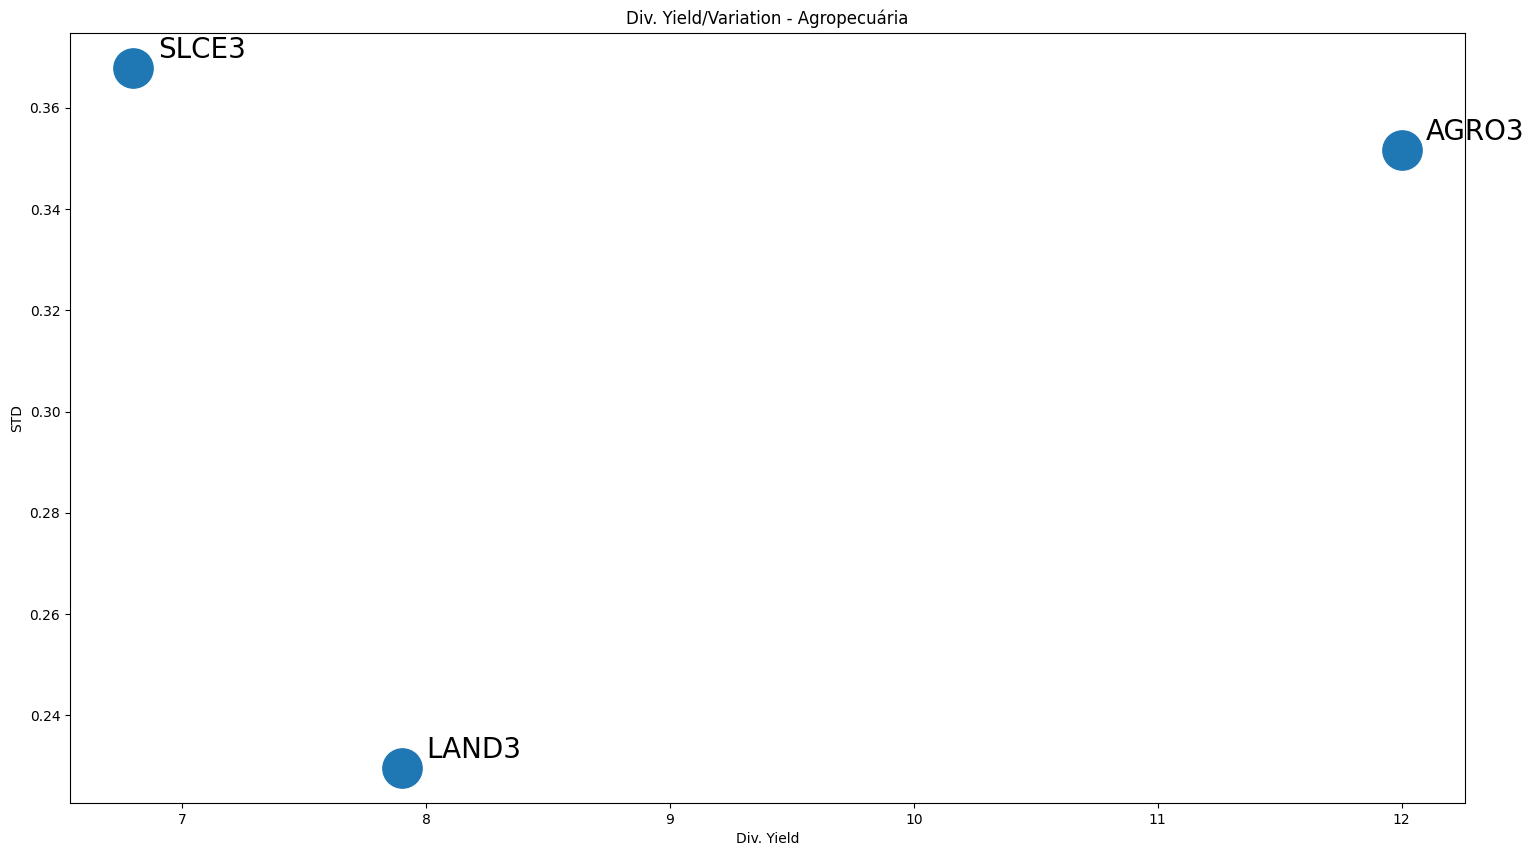

In [423]:
financial_data_agro = financial_data[financial_data['Setor'] == 'Agropecuária']

plt.scatter(financial_data_agro['Div. Yield'], financial_data_agro['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Agropecuária')

for i in financial_data_agro.index:
    plt.annotate(financial_data_agro.loc[i, 'nome'], xy=(financial_data_agro.loc[i, 'Div. Yield'] + 0.1, financial_data_agro.loc[i, 'std'] + 0.002), size=20)

plt.show()